### Setup

In [70]:
import spacy

In [29]:
%%capture
#!python -m spacy download nl_core_news_lg
!python -m spacy download en_core_web_lg

In [71]:
import en_core_web_lg
nlp = en_core_web_lg.load()
doc = nlp("This is a sentence.")
print([(w.text, w.pos_) for w in doc])

[('This', 'PRON'), ('is', 'AUX'), ('a', 'DET'), ('sentence', 'NOUN'), ('.', 'PUNCT')]


In [31]:
doc.vector[:10]

array([-0.0693734 ,  0.26776582, -0.13480794,  0.026144  ,  0.0945714 ,
       -0.1304826 ,  0.0398684 , -0.30131537,  0.0163348 ,  2.28744   ],
      dtype=float32)

In [72]:
import pandas as pd
import numpy as np

In [73]:
dat = pd.read_csv("aut_semdis_input.csv")
dat

,id,item,response,response_id,object,respondent_id,temperature
0,1,chair,doorstop,2022040001,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
1,2,chair,start a fire,2022040002,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
2,3,chair,prop up a table or chair leg,2022040003,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
3,4,chair,paperweight,2022040004,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
4,5,chair,make art such as by decoupaging it onto a canv...,2022040005,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
...,...,...,...,...,...,...,...
1638,1639,chair,rolls,20167316,tin can,BP20160002,NaN
1639,1640,chair,money box,20167317,tin can,BP20160002,NaN
1640,1641,chair,seat cover,20167318,tin can,BP20160002,NaN
1641,1642,chair,reflector on bicycle,20167319,tin can,BP20160002,NaN


### Compute semantic distances between response and target object

In [141]:
eucl_item_resp = [np.linalg.norm(x.vector - y.vector) for x,y in zip(nlp.pipe(dat.item.values), nlp.pipe(dat.response.values))]
eucl_objc_resp = [np.linalg.norm(x.vector - y.vector) for x,y in zip(nlp.pipe(dat.object.values), nlp.pipe(dat.response.values))]

In [142]:
cos_sim = lambda x,y: np.dot(x,y)/np.linalg.norm(x)/np.linalg.norm(y) if np.linalg.norm(x)>0 and np.linalg.norm(y) > 0 else 0
cos_dist_item_resp = [1-cos_sim(x.vector,y.vector) for x,y in zip(nlp.pipe(dat.item.values), nlp.pipe(dat.response.values))]

nr of errors:  0
 elements with error: []


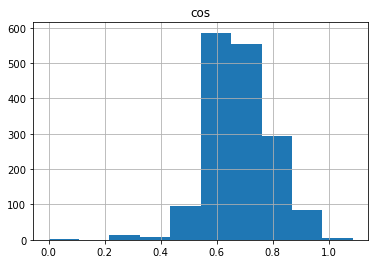

In [143]:
pd.DataFrame({"cos":cos_dist_item_resp}).hist()
print("nr of errors: ", np.sum(np.isnan(cos_dist_item_resp)))
print(" elements with error: %s" % (np.where(np.isnan(cos_dist_item_resp) == True)))

In [144]:
print(dat.iloc[971])
nlp(dat.iloc[971].response).vector

Unnamed: 0                    971
id                            972
item                        chair
response              firelighter
response_id              20161284
object                       book
respondent_id          BP20160029
temperature                   NaN
eucl_item_resp           6.875682
eucl_objc_resp           6.498696
cos_dist_item_resp       0.721438
cos_dist_objc_resp       0.807356
Name: 971, dtype: object


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [145]:
cos_dist_item_resp[971] = 1-cos_sim(nlp("fire lighter").vector, nlp("chair").vector) 

In [146]:
cos_dist_objc_resp = [1-cos_sim(x.vector,y.vector) for x,y in zip(nlp.pipe(dat.object.values), nlp.pipe(dat.response.values))]

In [147]:
cos_dist_objc_resp[971] = 1-cos_sim(nlp("fire lighter").vector, nlp("book").vector) 

In [148]:
dat['eucl_item_resp'] = eucl_item_resp
dat['eucl_objc_resp'] = eucl_objc_resp
dat['cos_dist_item_resp'] = cos_dist_item_resp
dat['cos_dist_objc_resp'] = cos_dist_objc_resp

In [149]:
dat

,Unnamed: 0,id,item,response,response_id,object,respondent_id,temperature,eucl_item_resp,eucl_objc_resp,cos_dist_item_resp,cos_dist_objc_resp
0,0,1,chair,doorstop,2022040001,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,8.658492,8.365611,0.854830,0.847086
1,1,2,chair,start a fire,2022040002,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,6.871257,6.382291,0.683055,0.639192
2,2,3,chair,prop up a table or chair leg,2022040003,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,4.980463,6.307006,0.297942,0.650515
3,3,4,chair,paperweight,2022040004,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,8.695191,8.987339,0.830964,0.939968
4,4,5,chair,make art such as by decoupaging it onto a canv...,2022040005,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,6.324841,5.784203,0.598833,0.540887
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1638,1639,chair,rolls,20167316,tin can,BP20160002,NaN,8.034032,6.342345,0.765450,0.673499
1639,1639,1640,chair,money box,20167317,tin can,BP20160002,NaN,7.089824,4.235904,0.694928,0.397266
1640,1640,1641,chair,seat cover,20167318,tin can,BP20160002,NaN,5.782039,5.718820,0.422534,0.642658
1641,1641,1642,chair,reflector on bicycle,20167319,tin can,BP20160002,NaN,6.752543,4.944438,0.663697,0.611948


In [150]:
dat.to_csv("aut_semdis_input_w_dists.csv")

### Compute semantic distances between subsequent responses within respondents

In [151]:
dat = pd.read_csv("aut_semdis_input_w_dists.csv")
dat

,Unnamed: 0.1,Unnamed: 0,id,item,response,response_id,object,respondent_id,temperature,eucl_item_resp,eucl_objc_resp,cos_dist_item_resp,cos_dist_objc_resp
0,0,0,1,chair,doorstop,2022040001,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,8.658492,8.365611,0.854830,0.847086
1,1,1,2,chair,start a fire,2022040002,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,6.871257,6.382291,0.683055,0.639192
2,2,2,3,chair,prop up a table or chair leg,2022040003,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,4.980463,6.307006,0.297942,0.650515
3,3,3,4,chair,paperweight,2022040004,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,8.695191,8.987339,0.830964,0.939968
4,4,4,5,chair,make art such as by decoupaging it onto a canv...,2022040005,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,6.324841,5.784203,0.598833,0.540887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1638,1638,1639,chair,rolls,20167316,tin can,BP20160002,NaN,8.034032,6.342345,0.765450,0.673499
1639,1639,1639,1640,chair,money box,20167317,tin can,BP20160002,NaN,7.089824,4.235904,0.694928,0.397266
1640,1640,1640,1641,chair,seat cover,20167318,tin can,BP20160002,NaN,5.782039,5.718820,0.422534,0.642658
1641,1641,1641,1642,chair,reflector on bicycle,20167319,tin can,BP20160002,NaN,6.752543,4.944438,0.663697,0.611948


In [152]:
cos_sim = lambda x,y: np.dot(x,y)/np.linalg.norm(x)/np.linalg.norm(y) if np.linalg.norm(x)>0 and np.linalg.norm(y) > 0 else 0

In [153]:
def nlpSR(string, keep_sw = False):
    doc = nlp(string)
    return sum([w.vector for w in doc if keep_sw or not w.is_stop], doc.vector*0)

def conseq_semdis(df):
    resp = df.response.values
    if len(resp) > 1:
        csq_semdis = [1]+[1-cos_sim(nlpSR(resp[i+1]),nlpSR(resp[i])) for i in range(len(df)-1)]
    else:
        csq_semdis = [1]
    df['semdis_prev'] = csq_semdis
    return df

dat2 = dat.sort_values(['respondent_id','response_id']).groupby('respondent_id').apply(conseq_semdis)
dat2

,Unnamed: 0.1,Unnamed: 0,id,item,response,response_id,object,respondent_id,temperature,eucl_item_resp,eucl_objc_resp,cos_dist_item_resp,cos_dist_objc_resp,semdis_prev
1368,1368,1368,1369,chair,conductor,20172822,fork,BP20160000,NaN,9.479910,9.907753,0.848169,0.934733,1.000000
1369,1369,1369,1370,chair,catapult,20172823,fork,BP20160000,NaN,8.275051,8.265690,0.844249,0.851954,0.984548
1370,1370,1370,1371,chair,keep elastic,20172824,fork,BP20160000,NaN,7.363023,7.273292,0.730956,0.722135,0.879121
1371,1371,1371,1372,chair,bobbin,20172825,fork,BP20160000,NaN,9.251673,9.003500,0.870786,0.832043,0.650933
1372,1372,1372,1373,chair,thumbtack substitute,20172826,fork,BP20160000,NaN,7.457361,7.560513,0.811973,0.850204,0.861105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,815,815,816,chair,pig,2022050312,tin can,cmpl-59ySPvIcRvSasC17RrZwg81HyHEQa,0.8,8.385424,6.353612,0.797555,0.625745,0.658608
816,816,816,817,chair,could be used as a vase for flowers,2022050313,tin can,cmpl-59ySSFYX1Mhi8Dk5POGScOVs4gYx0,0.8,6.399450,3.628503,0.606309,0.351478,1.000000
817,817,817,818,chair,could be used to hold paintbrushes and other p...,2022050314,tin can,cmpl-59ySSFYX1Mhi8Dk5POGScOVs4gYx0,0.8,6.408843,3.572936,0.616401,0.346348,0.547406
818,818,818,819,chair,could be used as a desk tidy to hold penspenci...,2022050315,tin can,cmpl-59ySSFYX1Mhi8Dk5POGScOVs4gYx0,0.8,6.041926,3.553559,0.522665,0.346119,0.480195


<AxesSubplot:>

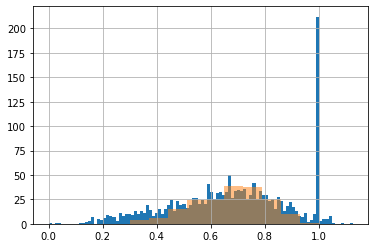

In [164]:
dat2.semdis_prev.hist(bins=100)
dat2.groupby('respondent_id').mean().semdis_prev.hist(alpha=0.5)

In [165]:
dat2.to_csv("aut_semdis_input_w_dists.csv")